# **Earthquake analysis**


## **Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

!pip install catboost

## **Load Data**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ismailtopcam/YZMT525/main/turkey_earthquake_1915_to_2023_over_4.5mw.csv')
df

,Deprem Kodu,Olus tarihi,Olus zamani,Enlem,Boylam,Derinlik,xM,MD,ML,Mw,Ms,Mb,Tip,Yer,Kayıp,Hasarlı Bina
0,20040701223008,2004.07.01,22:30:09,39.6300,43.9400,10.0,5.4,5.0,5.2,5.1,5.1,5.4,Ke,GUNYOLU-DOGUBAYAZIT (AGRI) [North West 4.5 km],17,1000
1,20040325193046,2004.03.25,19:30:46,39.9200,40.8200,10.0,5.5,5.5,5.4,5.6,5.6,0.0,Ke,KANDILLI-ASKALE (ERZURUM) [North West 2.4 km],9,1280
2,20010625132848,2001.06.25,13:28:49,37.1200,36.2800,27.0,5.5,5.5,0.0,5.5,5.5,0.0,Ke,ARSLANLI- (OSMANIYE) [South West 0.9 km],0,66
3,20001215164444,2000.12.15,16:44:44,38.6300,31.1900,13.0,5.8,5.8,0.0,5.8,5.8,0.0,Ke,EBER-CAY (AFYONKARAHISAR) [North East 6.4 km],6,547
4,20000606024149,2000.06.06,2:41:49,40.7000,32.9900,5.0,5.6,5.6,0.0,6.1,6.1,0.0,Ke,HACILAR-CERKES (�ANKIRI) [South East 1.5 km],1,1766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,19260626194638,1926.06.26,19:46:39,36.5400,27.3300,100.0,7.7,7.1,7.0,7.2,7.7,6.9,Ke,ONIKI ADALAR (AKDENIZ),0,0
2033,19990817000137,1999.08.17,0:01:38,40.7600,29.9700,18.0,7.4,6.7,0.0,7.4,7.8,0.0,Ke,BASISKELE (KOCAELI) [North East 2.0 km],17480,73342
2034,20230206102447,2023.02.06,10:24:48,38.0818,37.1773,5.0,7.6,0.0,7.4,7.6,7.6,0.0,Ke,EKINOZU (KAHRAMANMARAS) [North West 2.7 km],50783,165000
2035,19391226235720,1939.12.26,23:57:21,39.8000,39.5100,20.0,7.9,7.2,7.2,7.7,7.9,7.1,Ke,KURUTILEK- (ERZINCAN) [North East 3.0 km],32968,116720


## **Convert Datetime**

In [ ]:
df['Olus tarihi'] = pd.to_datetime(df['Olus tarihi'])
df


,Deprem Kodu,Olus tarihi,Olus zamani,Enlem,Boylam,Derinlik,xM,MD,ML,Mw,Ms,Mb,Tip,Yer,Kayıp,Hasarlı Bina
0,20040701223008,2004-07-01,22:30:09,39.6300,43.9400,10.0,5.4,5.0,5.2,5.1,5.1,5.4,Ke,GUNYOLU-DOGUBAYAZIT (AGRI) [North West 4.5 km],17,1000
1,20040325193046,2004-03-25,19:30:46,39.9200,40.8200,10.0,5.5,5.5,5.4,5.6,5.6,0.0,Ke,KANDILLI-ASKALE (ERZURUM) [North West 2.4 km],9,1280
2,20010625132848,2001-06-25,13:28:49,37.1200,36.2800,27.0,5.5,5.5,0.0,5.5,5.5,0.0,Ke,ARSLANLI- (OSMANIYE) [South West 0.9 km],0,66
3,20001215164444,2000-12-15,16:44:44,38.6300,31.1900,13.0,5.8,5.8,0.0,5.8,5.8,0.0,Ke,EBER-CAY (AFYONKARAHISAR) [North East 6.4 km],6,547
4,20000606024149,2000-06-06,2:41:49,40.7000,32.9900,5.0,5.6,5.6,0.0,6.1,6.1,0.0,Ke,HACILAR-CERKES (�ANKIRI) [South East 1.5 km],1,1766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,19260626194638,1926-06-26,19:46:39,36.5400,27.3300,100.0,7.7,7.1,7.0,7.2,7.7,6.9,Ke,ONIKI ADALAR (AKDENIZ),0,0
2033,19990817000137,1999-08-17,0:01:38,40.7600,29.9700,18.0,7.4,6.7,0.0,7.4,7.8,0.0,Ke,BASISKELE (KOCAELI) [North East 2.0 km],17480,73342
2034,20230206102447,2023-02-06,10:24:48,38.0818,37.1773,5.0,7.6,0.0,7.4,7.6,7.6,0.0,Ke,EKINOZU (KAHRAMANMARAS) [North West 2.7 km],50783,165000
2035,19391226235720,1939-12-26,23:57:21,39.8000,39.5100,20.0,7.9,7.2,7.2,7.7,7.9,7.1,Ke,KURUTILEK- (ERZINCAN) [North East 3.0 km],32968,116720


## **Aylara Göre Deprem Yoğunluğu**

<Axes: title={'center': 'Aylara Göre Deprem Sayısı'}, xlabel='ay'>

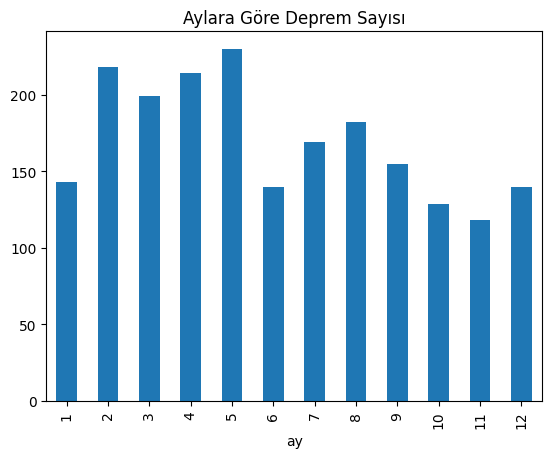

In [ ]:
df['ay'] = df['Olus tarihi'].dt.month
monthly_quakes = df.groupby('ay').size()

monthly_quakes.plot(kind='bar', title='Aylara Göre Deprem Sayısı')


## **Enlem Boylama Göre Deprem Yoğunluğu**

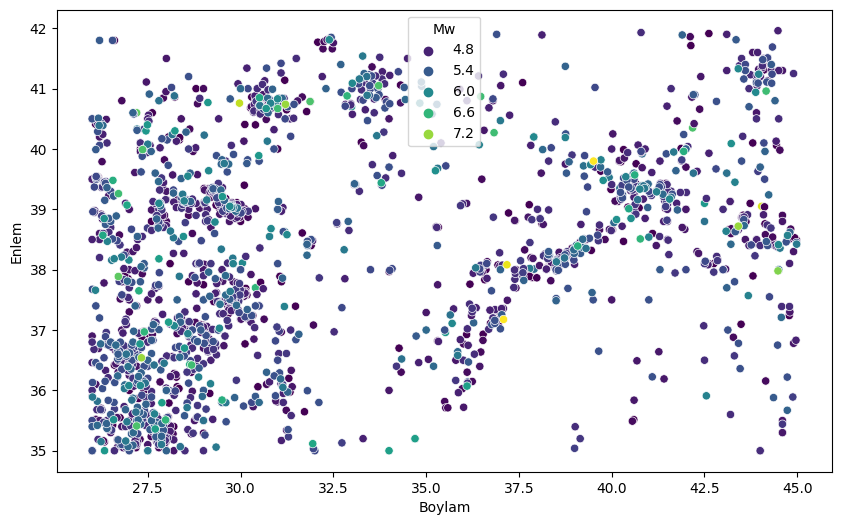

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Boylam'], y=df['Enlem'], hue=df['Mw'], palette='viridis')
plt.show()

## **Bölgelere Göre Deprem Yoğunluğu**

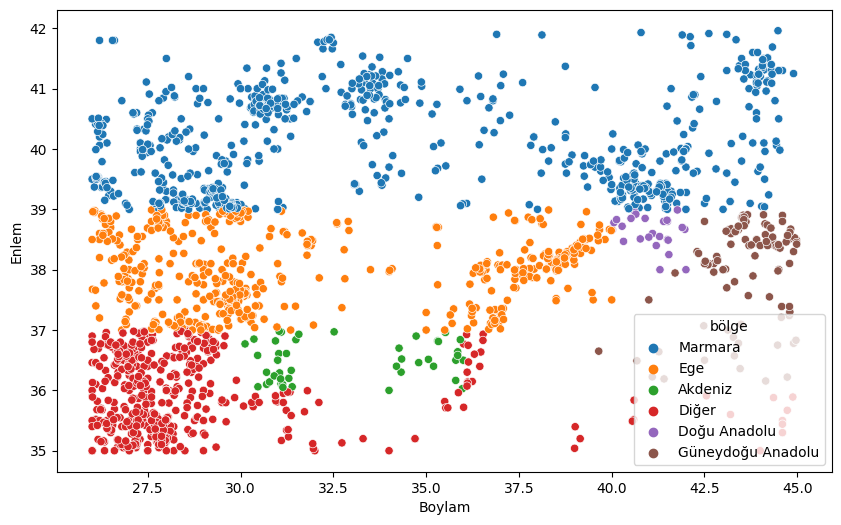

In [ ]:
def assign_region(lat, lon):
    if 39 <= lat <= 42 and 26 <= lon <= 45:
        return 'Marmara'
    elif 37 <= lat <= 39 and 26 <= lon <= 40:
        return 'Ege'
    elif 36 <= lat <= 39 and 30 <= lon <= 36:
        return 'Akdeniz'
    elif 40 <= lat <= 42 and 32 <= lon <= 40:
        return 'İç Anadolu'
    elif 40 <= lat <= 42 and 40 <= lon <= 45:
        return 'Karadeniz'
    elif 38 <= lat <= 42 and 36 <= lon <= 42:
        return 'Doğu Anadolu'
    elif 36 <= lat <= 40 and 37 <= lon <= 45:
        return 'Güneydoğu Anadolu'
    else:
        return 'Diğer'

df['bölge'] = df.apply(lambda row: assign_region(row['Enlem'], row['Boylam']), axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Boylam'], y=df['Enlem'], hue=df['bölge'])
plt.show()

## **5 ve üzeri depremlerin zaman dilimlerine göre dağılımı**

<Axes: title={'center': 'Zaman Dilimlerine Göre Mw 5 ve Üzeri Deprem Sayısı'}>

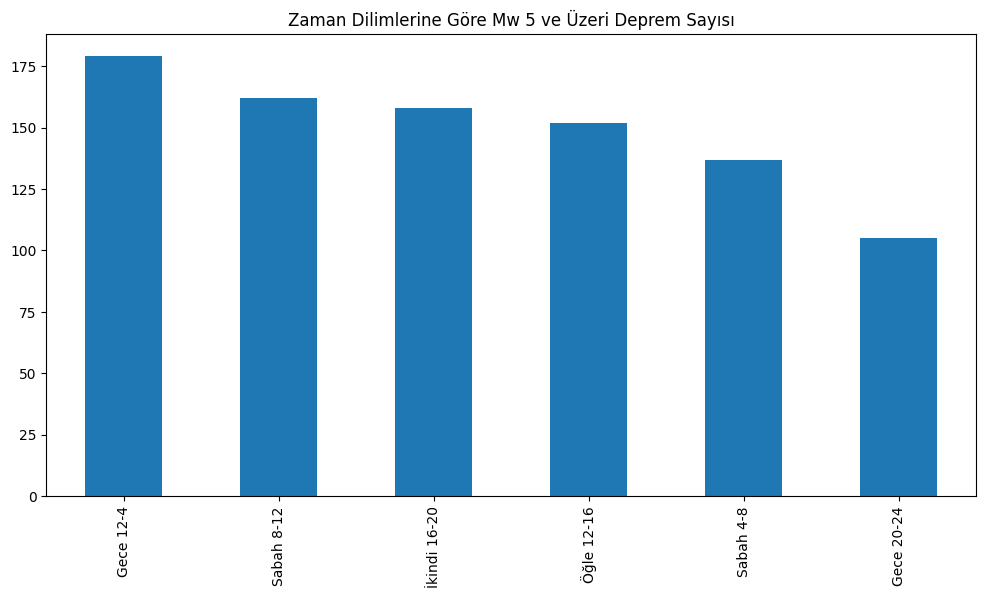

In [ ]:
df['Olus zamani'] = pd.to_datetime(df['Olus zamani']).dt.time

# Öncelikle 'Olus zamani' sütununu saat ve dakika formatına dönüştürelim.
df['saat'] = df['Olus zamani'].apply(lambda x: x.hour)

# Saatler için alt/üst limitleri belirleyelim.
bins = [0, 4, 8, 12, 16, 20, 24]

# Bu limitlere karşılık gelecek zaman dilimlerini isimlendirelim.
labels = ['Gece 12-4', 'Sabah 4-8', 'Sabah 8-12', 'Öğle 12-16', 'İkindi 16-20', 'Gece 20-24']

# 'saat' sütunu üzerinde belirlediğimiz dilimlere göre bölme işlemi yapalım.
df['zaman_dilimi'] = pd.cut(df['saat'], bins=bins, labels=labels, include_lowest=True)

# 5 ve üzeri depremleri filtreleyelim.
df_strong = df[df['Mw'] >= 5]

# Zaman dilimlerine göre deprem sayılarını hesaplayalım.
period_counts = df_strong['zaman_dilimi'].value_counts()

# Bu bilgiyi bir bar grafiği ile gösterelim.
period_counts.plot(kind='bar', figsize=(12,6), title='Zaman Dilimlerine Göre Mw 5 ve Üzeri Deprem Sayısı')


## **Mevsimlere Göre dağılım**

<Axes: title={'center': '4.5 Mw üzeri Depremlerin Mevsimlere Göre Dağılımı'}>

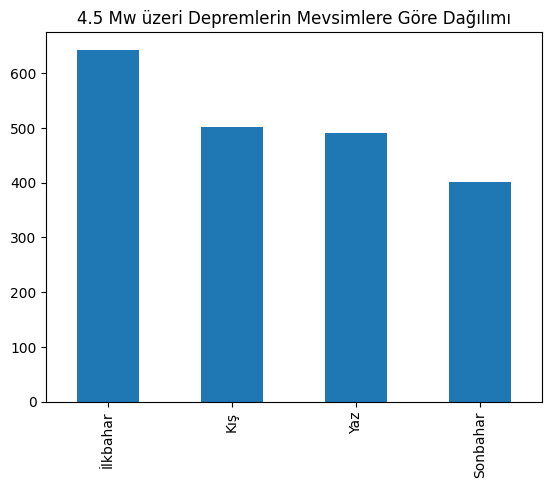

In [ ]:

# Depremlerin olduğu mevsimi belirleyelim.
df['mevsim'] = df['Olus tarihi'].dt.month%12 // 3 + 1
seasons = {1: 'Kış', 2: 'İlkbahar', 3: 'Yaz', 4: 'Sonbahar'}
df['mevsim'] = df['mevsim'].map(seasons)

# Mevsime göre deprem sayılarını hesaplayalım.
season_counts = df['mevsim'].value_counts()

# Bu bilgiyi bir bar grafiği ile gösterelim.
season_counts.plot(kind='bar', title='4.5 Mw üzeri Depremlerin Mevsimlere Göre Dağılımı')


## **Yıkım olan depremlerin mevsimlere göre dağılımı**

<Axes: title={'center': 'Mevsimlere Göre Kayıp veya Hasarlı Bina Sayısı'}>

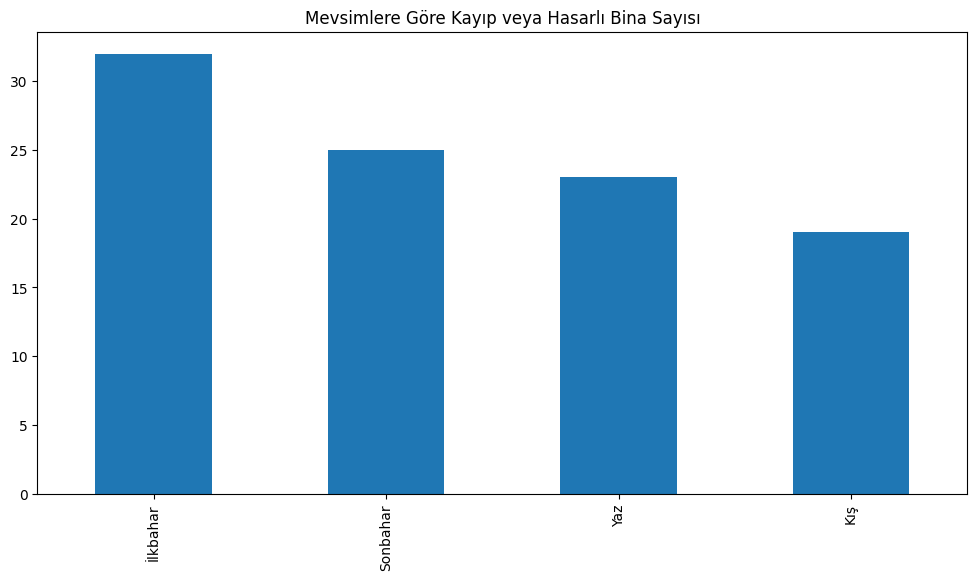

In [ ]:
# Kayıp veya Hasarlı Bina değeri 0'dan yüksek olan verileri filtreleyelim.
df_damage = df[(df['Kayıp'] > 0) | (df['Hasarlı Bina'] > 0)].copy()

# Tarihi mevsimlere dönüştürme
df_damage['mevsim'] = df_damage['Olus tarihi'].dt.month%12 // 3 + 1
seasons = {1: 'Kış', 2: 'İlkbahar', 3: 'Yaz', 4: 'Sonbahar'}
df_damage['mevsim'] = df_damage['mevsim'].map(seasons)

# Mevsimlere göre hasarlı bina ve kayıp sayılarını hesaplayalım.
season_counts = df_damage['mevsim'].value_counts()

# Bu bilgiyi bir bar grafiği ile gösterelim.
season_counts.plot(kind='bar', figsize=(12,6), title='Mevsimlere Göre Kayıp veya Hasarlı Bina Sayısı')

## **Top 10**

In [ ]:
import plotly.express as px

Yer_count = df.groupby(pd.Grouper(key='Yer')).size().reset_index(name='count')
Yer_count_top = Yer_count.nlargest(10, 'count')[['Yer', 'count']]
fig = px.bar(Yer_count_top, x='Yer', y='count', color='Yer', text='count')
fig.update_layout(title_text='Top 10 Frequent Earthquake Locations',
                  title_x=0.5, title_font=dict(size=30))
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

## **Depremlerin yıllara göre dağılımları**

In [ ]:
df['Olus tarihi'] = pd.to_datetime(df['Olus tarihi'])
y = df['Olus tarihi'].value_counts()
y = y.resample('Y').sum().to_frame()
fig = px.line(y, x=y.index, y='Olus tarihi', text='Olus tarihi',
              labels={
                  "index": "Year",
                  "Olus tarihi": "Number of Earthquakes"
              })
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_traces(textposition='top center')
fig.update_layout(title_text='Number of Earthquakes Annually',
                  title_x=0.5, title_font=dict(size=30))
fig.show()

## **Depremlerin lokasyon dağılımı**

In [ ]:
Yer_count = df.groupby(pd.Grouper(key='Yer')).size().reset_index(name='count')
fig = px.treemap(Yer_count, path=['Yer'], values='count')
fig.update_layout(title_text='Number of Earthquakes due to Location',
                  title_x=0.5, title_font=dict(size=30)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

## **Top 10 Yıkım olan depremler**

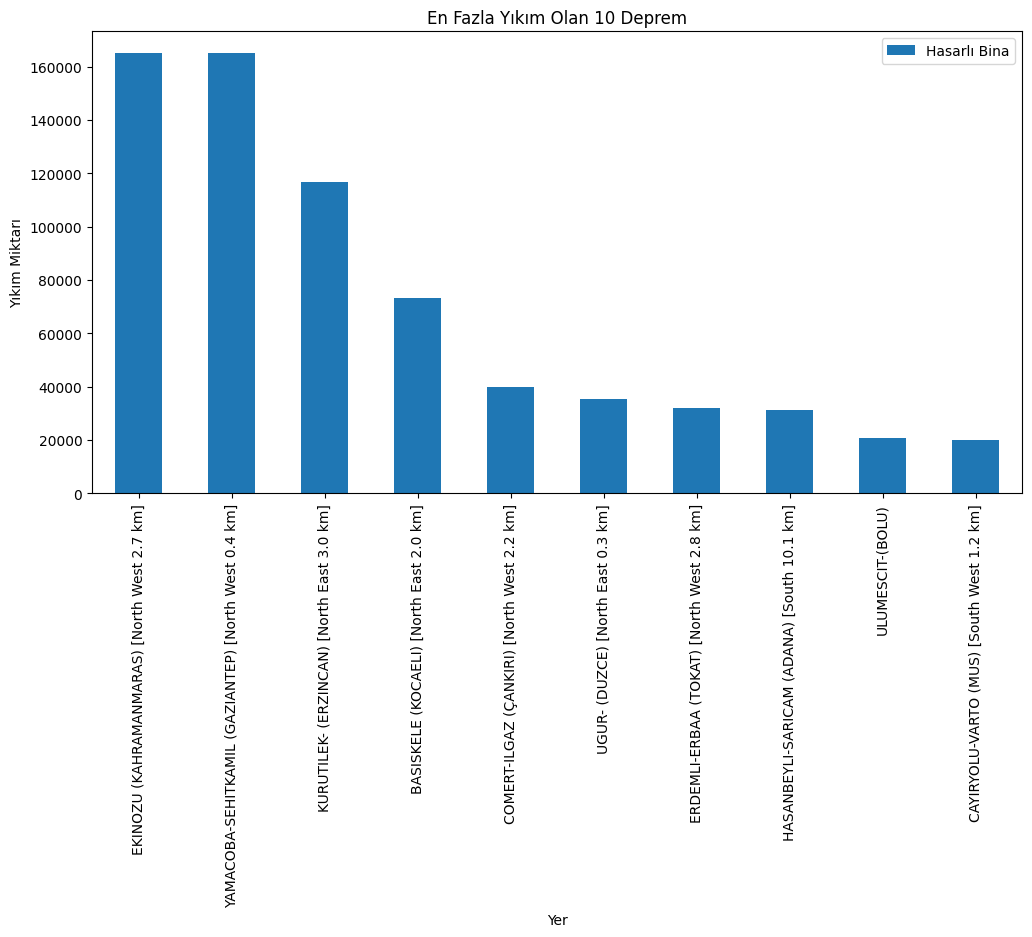

In [ ]:
# Hasara göre en yüksek 10 depremi seçelim.
top_damage = df.nlargest(10, 'Hasarlı Bina')

# Yıkım miktarını gösteren bir bar plot oluşturalım.
top_damage.plot(x='Yer', y='Hasarlı Bina', kind='bar', title='En Fazla Yıkım Olan 10 Deprem', figsize=(12,6))
plt.xlabel('Yer')
plt.ylabel('Yıkım Miktarı')
plt.show()

## **Depremlerin Derinlik ve Büyüklük Dağılımı**

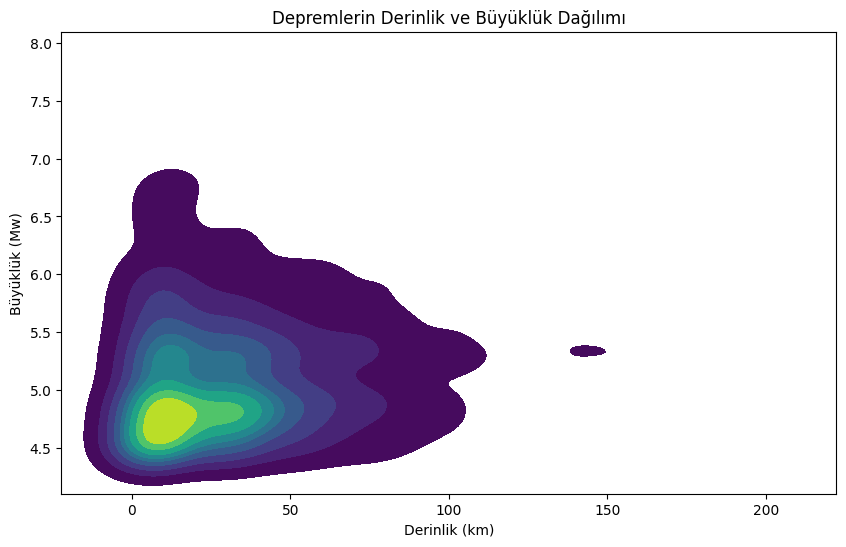

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="Derinlik", y="Mw", cmap="viridis", fill=True)
plt.title('Depremlerin Derinlik ve Büyüklük Dağılımı')
plt.xlabel('Derinlik (km)')
plt.ylabel('Büyüklük (Mw)')
plt.show()

## **Korelasyon Matrisi**

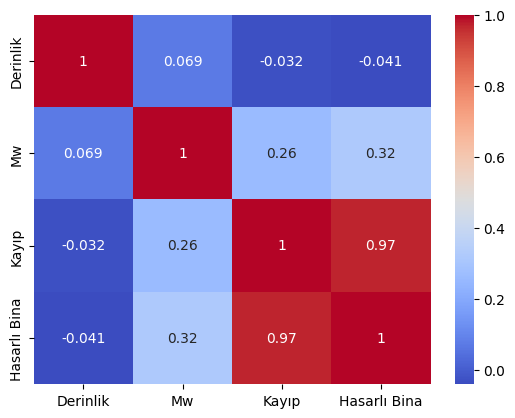

In [ ]:
import seaborn as sns

# İlgilendiğimiz sütunları seçelim.
data = df[['Derinlik', 'Mw', 'Kayıp', 'Hasarlı Bina']]

# Korelasyon matrisini hesaplayalım.
corr = data.corr()

# Korelasyon matrisini ısı haritası (heatmap) olarak çizdirelim.
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## **Deprem Büyüklüğü ve Derinliği Zamanla Değişimi**

<ipython-input-57-d7227d826db9>:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



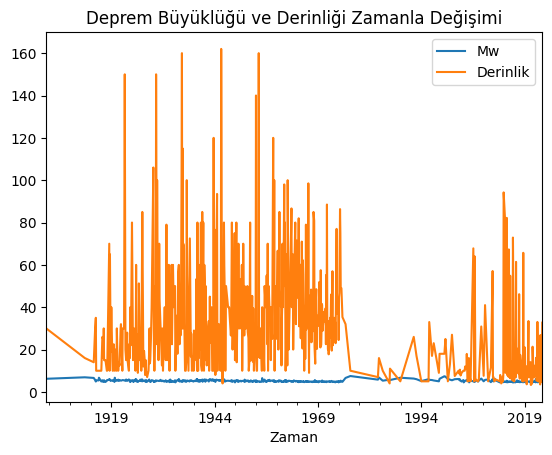

In [ ]:
# 'tarih' sütunu pandas datetime formatına çevirilir
df['tarih'] = pd.to_datetime(df['Olus tarihi'], format='%Y.%m.%d')

# Yıl ve ay bazında gruplama yaparak trendleri gözlemleyebiliriz.
df.groupby(df['Olus tarihi'].dt.to_period("M")).mean()[['Mw', 'Derinlik']].plot(kind='line')
plt.title('Deprem Büyüklüğü ve Derinliği Zamanla Değişimi')
plt.xlabel('Zaman')
plt.show()